In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import models, layers, datasets

In [19]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

In [21]:
train_images.shape

(50000, 32, 32, 3)

In [22]:
train_labels.shape

(50000, 1)

Text(0.5, 1.0, '6')

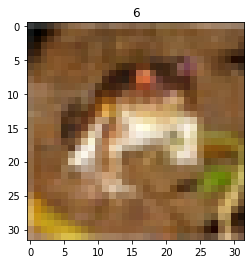

In [25]:
plt.imshow(train_images[0])
plt.title(train_labels[0][0])


In [26]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [31]:
class_names[0]

'airplane'

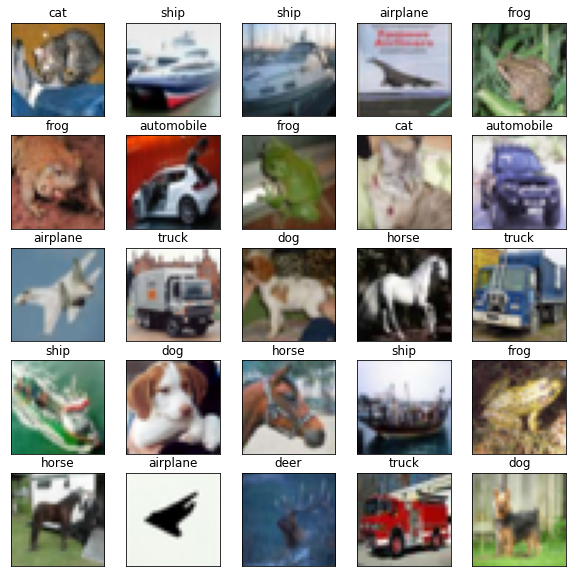

In [38]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    plt.title(class_names[test_labels[i][0]])
    plt.xticks([])
    plt.yticks([])
plt.show()

In [39]:
train_images,test_images = train_images/255.0,test_images/255.0

In [40]:
train_images[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [44]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3))),
model.add(layers.MaxPooling2D((2,2))),
model.add(layers.Conv2D(64,(3,3),activation='relu')),
model.add(layers.MaxPooling2D((2,2))),
model.add(layers.Conv2D(64,(3,3),activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.add(layers.Flatten()),
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [46]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [49]:
history = model.fit(train_images,train_labels,epochs=22,validation_data=(test_images,test_labels))

Epoch 1/22
1563/1563 [==============================] - 49s 32ms/step - loss: 0.2690 - accuracy: 0.9068 - val_loss: 1.2904 - val_accuracy: 0.6784
Epoch 2/22
1563/1563 [==============================] - 48s 31ms/step - loss: 0.2515 - accuracy: 0.9136 - val_loss: 1.3840 - val_accuracy: 0.6776
Epoch 3/22
1563/1563 [==============================] - 48s 31ms/step - loss: 0.2331 - accuracy: 0.9193 - val_loss: 1.3624 - val_accuracy: 0.6740
Epoch 4/22
1563/1563 [==============================] - 48s 31ms/step - loss: 0.2159 - accuracy: 0.9256 - val_loss: 1.4445 - val_accuracy: 0.6781
Epoch 5/22
1563/1563 [==============================] - 48s 31ms/step - loss: 0.2011 - accuracy: 0.9298 - val_loss: 1.4913 - val_accuracy: 0.6733
Epoch 6/22
1563/1563 [==============================] - 48s 31ms/step - loss: 0.1875 - accuracy: 0.9352 - val_loss: 1.5658 - val_accuracy: 0.6665
Epoch 7/22
1563/1563 [==============================] - 48s 31ms/step - loss: 0.1744 - accuracy: 0.9413 - val_loss: 1.5485 -

In [50]:
history.history

{'loss': [0.26903578639030457,
  0.2514989674091339,
  0.2331438809633255,
  0.2158529907464981,
  0.20114026963710785,
  0.18752001225948334,
  0.1743597835302353,
  0.1654690057039261,
  0.15284395217895508,
  0.14315102994441986,
  0.13905534148216248,
  0.12579111754894257,
  0.12202171236276627,
  0.12021391838788986,
  0.11056799441576004,
  0.11082781106233597,
  0.09865835309028625,
  0.10763979703187943,
  0.09027805924415588,
  0.09291546046733856,
  0.09976208955049515,
  0.09169717133045197],
 'accuracy': [0.9068199992179871,
  0.9135599732398987,
  0.9192799925804138,
  0.925599992275238,
  0.9297999739646912,
  0.9352200031280518,
  0.94132000207901,
  0.9424999952316284,
  0.9470800161361694,
  0.951200008392334,
  0.952019989490509,
  0.9580199718475342,
  0.9589800238609314,
  0.9597799777984619,
  0.962440013885498,
  0.9623399972915649,
  0.9669399857521057,
  0.9625999927520752,
  0.9695799946784973,
  0.9671400189399719,
  0.9646400213241577,
  0.9697999954223633],

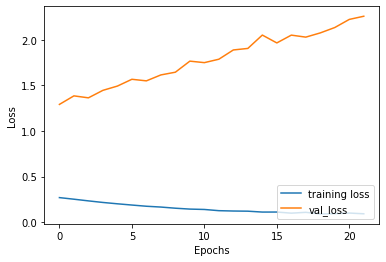

In [51]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend(loc='lower right')
plt.show()


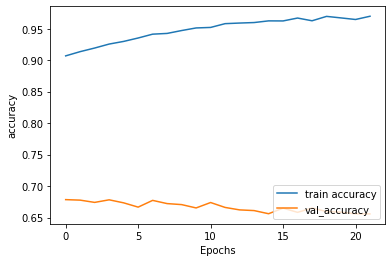

In [52]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

plt.legend(loc='lower right')
plt.show()

In [53]:
test_loss, test_acc = model.evaluate(test_images,test_labels)

313/313 [==============================] - 3s 11ms/step - loss: 2.2566 - accuracy: 0.6557


In [54]:
test_loss

2.256638526916504

In [55]:
test_labels[100]

array([4], dtype=uint8)

In [56]:
model.predict(test_images[100].reshape(1,32,32,3))

array([[2.7443572e-11, 2.3276392e-12, 2.1703333e-04, 2.3992309e-04,
        9.9441236e-01, 2.0093542e-04, 3.1531033e-10, 4.9296794e-03,
        1.1426990e-07, 1.8442668e-08]], dtype=float32)

In [62]:
model.predict(test_images[100].reshape(1,32,32,3)).round()

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [61]:
class_names[np.argmax(model.predict(test_images[100].reshape(1,32,32,3)))]

'deer'